In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime
import random


In [2]:
def Limpieza_personas(data):
    data.replace({'Capital Federal': 'Ciudad Autonoma Buenos Aires'}, inplace=True)

    Dic2 = {'Ciudad Autonoma Buenos Aires': 'Ciudad Autónoma de Buenos Aires', 'Tucuman':'Tucumán', 'Cordoba':'Córdoba', 'Entre Rios': 'Entre Ríos', 'Neuquen': 'Neuquén', 'Rio Negro':'Río Negro'}
    data = data.replace(Dic2)

    return data

In [3]:
def Pyme(data):
    data.rename(columns= {'LOCALIDAD': 'CIUDAD'}, inplace=True)
    data['PROVINCIA'] = data.apply(lambda row: 'Ciudad Autónoma de Buenos Aires' if row['CIUDAD'] == 'CABA' else row['PROVINCIA'], axis=1)
    data['PROVINCIA'] = data.apply(lambda row: 'Tierra del Fuego' if row['PROVINCIA'] == 'Ushuaia' else row['PROVINCIA'], axis=1)
    return data

In [4]:
data_pyme = pd.read_csv("Data/pyme.csv", delimiter=';')

c:\Users\102140\Anaconda3\envs\dhdsblend2021\lib\site-packages\IPython\core\interactiveshell.py:3194: DtypeWarning: Columns (7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
data_personas = pd.read_csv("Data/personas.csv")

In [6]:
data_mipyme2 = pd.read_csv("Data/registro_mipyme_04-08-2023.csv", delimiter=';')

In [7]:
data_risks_delincuencia = pd.read_csv("Data/snic-provincias.csv", delimiter=',')

In [8]:
data_pyme.rename(columns= {'LOCALIDAD': 'CIUDAD'}, inplace=True)

In [9]:
merged_data = data_personas.merge(data_pyme[['KEY_CLIENT', 'PROVINCIA']], on='KEY_CLIENT', how='left')
data_personas['PROVINCIA'] = data_personas['PROVINCIA'].fillna(merged_data['PROVINCIA_y'])

In [10]:
data_limpieza_personas_new = Limpieza_personas(data_personas)

In [11]:
Lista_filaNew = []
for index, row in data_pyme.iterrows():
        valor = row['Unnamed: 12']
        if isinstance(valor, str) and not valor.isnumeric():
            Lista_filaNew.append(index)
            print(f"Fila {index}, Columna {'Unnamed: 12'}: Valor no numérico = {valor}")

Fila 2629, Columna Unnamed: 12: Valor no numérico = f05fa95ef1f145ed27ee364658b93c2f5eb78085e9fdf2a0751d8fa0489f6cec
Fila 28292, Columna Unnamed: 12: Valor no numérico = a0b8c633ac88394d21e47a8a376b146ff1daf6a7247fe7be6e36b642b302c1d8
Fila 51197, Columna Unnamed: 12: Valor no numérico = 2e61fdd784d541e221f0da256fea240ec93fca8e12bad51d4fe6fc7f9413a5a7
Fila 56435, Columna Unnamed: 12: Valor no numérico = 3247adc1c9f1239a7ad2d3af06e8d857ec01fde8858cef2062d7efa2efbc0362
Fila 92509, Columna Unnamed: 12: Valor no numérico = 13331c04afa048fec45f48339dbbca5bc048208ca6fe2cf146fe2543776f028f
Fila 109982, Columna Unnamed: 12: Valor no numérico = 8bf9e8a6c48a308cab6cd61afd15cd2452e80a1932113ecab5f5fa3f2fb90a41
Fila 140337, Columna Unnamed: 12: Valor no numérico = c59adb5b6366141a60a92496842206e1ffa080c160ba65a43cb856f7ed17063e
Fila 144995, Columna Unnamed: 12: Valor no numérico = 270dc6b80db307048f715c9f3cda30e100cb8d21d05849f3aff78e584e9e0d59
Fila 146392, Columna Unnamed: 12: Valor no numérico = 

In [12]:
columnas = ['Q_EMPLEADOS',	'PAGO_SUELDO_CCSS',	'PERFIL_INVERSOR',	'SCORING_CREDITICIO',	'KEY_CLIENT', 'Unnamed: 12' ]

for fila in Lista_filaNew:
    valor_C = data_pyme.at[fila, "Q_EMPLEADOS"]
    valor_D = data_pyme.at[fila, "PAGO_SUELDO_CCSS"]
    valor_E = data_pyme.at[fila, "PERFIL_INVERSOR"]
    valor_F = data_pyme.at[fila, "SCORING_CREDITICIO"]
    valor_G = data_pyme.at[fila, "KEY_CLIENT"]
    Valor_H = data_pyme.at[fila, "Unnamed: 12"]
    
    data_pyme.at[fila, "RENTABILIDAD"] = valor_C
    data_pyme.at[fila, "Q_EMPLEADOS"] = valor_D
    data_pyme.at[fila, "PAGO_SUELDO_CCSS"] = valor_E
    data_pyme.at[fila, "PERFIL_INVERSOR"] = valor_F 
    data_pyme.at[fila, "SCORING_CREDITICIO"] = valor_G
    data_pyme.at[fila, "KEY_CLIENT"] = Valor_H

data_pyme.at[fila, columnas[-1]] = None
    

In [13]:
data_pyme['Q_EMPLEADOS'] = data_pyme['Q_EMPLEADOS'].astype(int)
data_pyme['PAGO_SUELDO_CCSS'] = data_pyme['PAGO_SUELDO_CCSS'].str.replace('[^\d.]', '', regex=True).astype(float)
data_pyme['SCORING_CREDITICIO'] = data_pyme['SCORING_CREDITICIO'].str.replace('.', '').astype(int)
data_pyme.drop(['id'], axis=1, inplace=True)
data_pyme.drop(["Unnamed: 12"], axis=1, inplace=True)

In [14]:
data_pyme.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
COD_ACT_AFIP,458200.0,5.886234e+05,2.201187e+05,8.0,472130.0,523399.0,702099.0,990000.0
Q_EMPLEADOS,466792.0,3.289981e+00,5.045685e+02,0.0,0.0,0.0,0.0,337405.0
PAGO_SUELDO_CCSS,466792.0,2.962176e+05,1.127305e+06,0.0,0.0,0.0,0.0,9999014.0
SCORING_CREDITICIO,466792.0,1.025580e+06,2.287968e+06,0.0,0.0,0.0,0.0,8174769.0


In [15]:
Pyme_columnas_seleccionadas = data_pyme.iloc[:, 2:]
Resultado_Pyme_Personas = data_limpieza_personas_new.merge(Pyme_columnas_seleccionadas, on='KEY_CLIENT', how='left') 

In [16]:
test = data_mipyme2.groupby(['CLAE6', 'Sector']).size().reset_index(name='Cantidad')
test = test.sort_values(by='Cantidad', ascending=False)
test = test.drop_duplicates(subset='CLAE6', keep='first')
data_sector = test.iloc[:,:2]
data_sector = data_sector.rename(columns={'CLAE6':'COD_ACT_AFIP'})
data_sector

,COD_ACT_AFIP,Sector
1903,960990.0,Servicios
1589,681098.0,Servicios
1807,869090.0,Servicios
1372,492290.0,Industria
1595,681099.0,Servicios
...,...,...
1377,493120.0,Servicios
1376,493110.0,Servicios
1571,661992.0,Servicios
1563,661111.0,Servicios


In [17]:
Resultado_Pyme_Personas = Resultado_Pyme_Personas.merge(data_sector, on='COD_ACT_AFIP', how='left') 
Resultado_Pyme_Personas

,PROVINCIA,CIUDAD,KEY_CLIENT,DESC_SEGMENTO,COD_ACT_AFIP,DESC_ACT_AFIP,RENTABILIDAD,Q_EMPLEADOS,PAGO_SUELDO_CCSS,PERFIL_INVERSOR,SCORING_CREDITICIO,Sector
0,Formosa,FORMOSA,7dc7616e7e9c41c9ef0ab6de733a8fa932a149720aec7e...,NEGOCIOS Y PROFESIONALES,14113.0,"CRMA DE GANADO BOVINO, EXCEPTO LA REALIZADA EN...",NaN,0,0.0,Transaccional,0,Agropecuario
1,Ciudad Autónoma de Buenos Aires,CIUDAD AUTONOMA DE BUENOS AIRES,51c79997f0b7446fecde2d0248eeff0bcba9b9e4411497...,NEGOCIOS Y PROFESIONALES GOLD,469090.0,VENTA AL POR MAYOR DE MERCANCMAS N.C.P.,NaN,2,7467298.0,Paquete,0,Comercio
2,Ciudad Autónoma de Buenos Aires,CIUDAD AUTONOMA DE BUENOS AIRES,c6e1f36191e7bdccbf2045cf394db38304a1a5a560008c...,NEGOCIOS Y PROFESIONALES GOLD,681098.0,SERVICIOS INMOBILIARIOS REALIZADOS POR CUENTA ...,NaN,0,0.0,Principal Deuda,0,Servicios
3,Ciudad Autónoma de Buenos Aires,CIUDAD AUTONOMA DE BUENOS AIRES,330b2682647e9da65841b5b44c72994b66fe551f39f8ad...,NEGOCIOS Y PROFESIONALES GOLD,477210.0,VENTA AL POR MENOR DE ARTMCULOS DE TALABARTERM...,NaN,0,0.0,Principal Deuda,0,Comercio
4,Ciudad Autónoma de Buenos Aires,CIUDAD AUTONOMA DE BUENOS AIRES,04cdd2d80899b576f1edcfdce3980f51e4781b6bd59a6a...,NEGOCIOS Y PROFESIONALES,702091.0,"SERVICIOS DE ASESORAMIENTO, DIRECCISN Y GESTIS...",NaN,0,0.0,Transaccional,0,Servicios
...,...,...,...,...,...,...,...,...,...,...,...,...
85772,Ciudad Autónoma de Buenos Aires,CIUDAD AUTONOMA DE BUENOS AIRES,2c83721efa0bb61b13097bad0e1d42ed2293b4875393ad...,PYME Micro,477470.0,"VENTA AL POR MENOR DE PRODUCTOS VETERINARIOS, ...",MEDIO,4,56702.0,Principal Transaccional,6464969,Comercio
85773,Córdoba,VILLA ALLENDE,8693ebd71ce6b38641b971f1994e7b91b5bbcaba3453bf...,PYME Micro,410021.0,"CONSTRUCCISN, REFORMA Y REPARACISN DE EDIFICIO...",MEDIO,27,88000.0,Principal Transaccional,717403,Construccion
85774,Buenos Aires,LOBOS,5af9fac2623f8b087f4d85c62cccfbfa997f000ce5a5f6...,PYME PES,477320.0,"VENTA AL POR MENOR DE PRODUCTOS COSMITICOS, DE...",MEDIO,16,711463.0,Principal Transaccional,701183,Comercio
85775,Córdoba,CORDOBA,6190b622ef4ea20a514942e8b817ade046092a41c709b2...,PYME Micro,432190.0,"INSTALACISN, EJECUCISN Y MANTENIMIENTO DE INST...",BAJO,0,0.0,NaN,0,Construccion


In [ ]:
#Definidos los tipos de sectores que figuren en la columnas des act afip 

    Trabajar con lo referente a la cmbinacion para hacer el merge con coberturas agrupados y de ahi viedo que puede combinarse como grupos considerando los riesgos las coberturas y las caracteristicas viendo que grupos toman determinados seguros. 

In [18]:
Resultado_Pyme_Personas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85777 entries, 0 to 85776
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PROVINCIA           85770 non-null  object 
 1   CIUDAD              85575 non-null  object 
 2   KEY_CLIENT          85777 non-null  object 
 3   DESC_SEGMENTO       85777 non-null  object 
 4   COD_ACT_AFIP        84611 non-null  float64
 5   DESC_ACT_AFIP       84611 non-null  object 
 6   RENTABILIDAD        10225 non-null  object 
 7   Q_EMPLEADOS         85777 non-null  int32  
 8   PAGO_SUELDO_CCSS    85777 non-null  float64
 9   PERFIL_INVERSOR     64114 non-null  object 
 10  SCORING_CREDITICIO  85777 non-null  int32  
 11  Sector              84129 non-null  object 
dtypes: float64(2), int32(2), object(8)
memory usage: 7.9+ MB


In [19]:
test_new = Resultado_Pyme_Personas.dropna()
test_new['SCORING_CREDITICIO'].sort_values(ascending=False)

23518    8174769
33820    8174769
18528    8174769
28636    8174769
5472     8174769
          ...   
36830          0
11346          0
11297          0
5008           0
54520          0
Name: SCORING_CREDITICIO, Length: 9042, dtype: int32

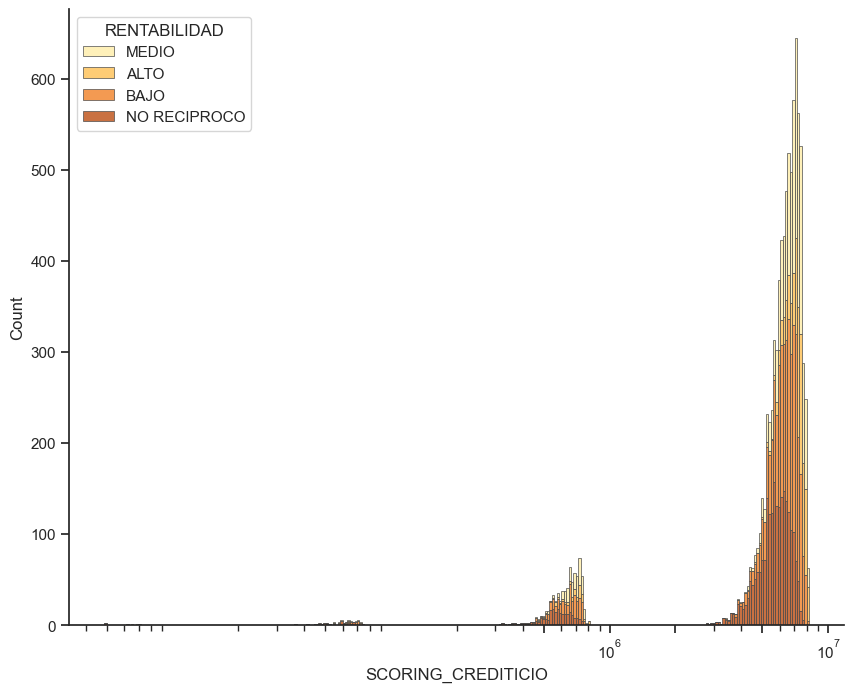

In [20]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 8))
sns.despine(f)

filtered_data = test_new[test_new['SCORING_CREDITICIO'] > 0]

sns.histplot(
    data=filtered_data,
    x="SCORING_CREDITICIO",
    hue="RENTABILIDAD",
    multiple="stack",
    palette = "YlOrBr",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.set_xscale('log')
ax.set_xticks([500000, 1000000, 2000000, 5000000, 10000000])

plt.show()


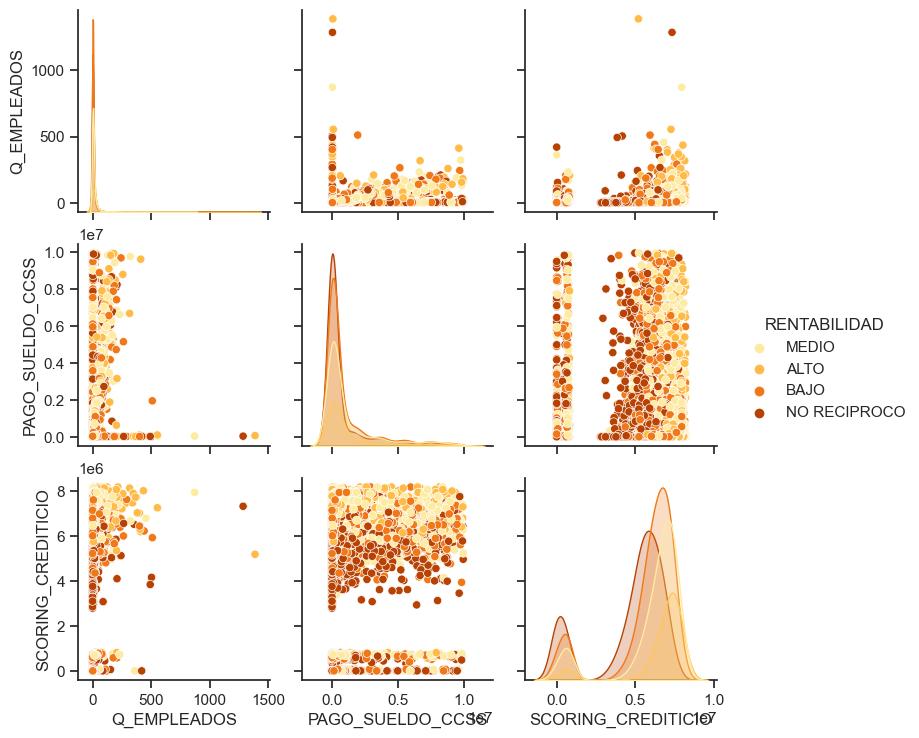

In [21]:
sns.pairplot(test_new.iloc[:,5:], hue="RENTABILIDAD", palette="YlOrBr")

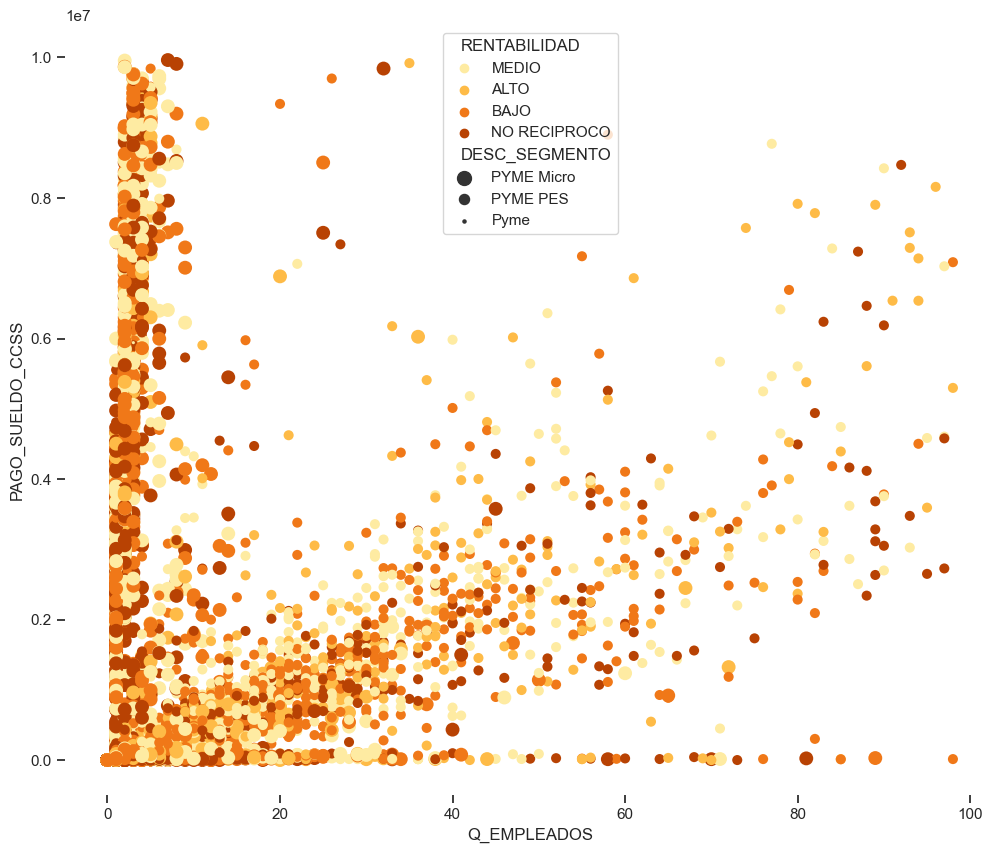

In [481]:
f, ax = plt.subplots(figsize=(12, 10))

filtered_data2 = test_new[test_new['Q_EMPLEADOS'] < 100]

sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='Q_EMPLEADOS', y='PAGO_SUELDO_CCSS',
                hue='RENTABILIDAD',
                palette="YlOrBr",
                sizes=(5, 100), linewidth=0, size='DESC_SEGMENTO',
                data=filtered_data2, ax=ax)
plt.show()


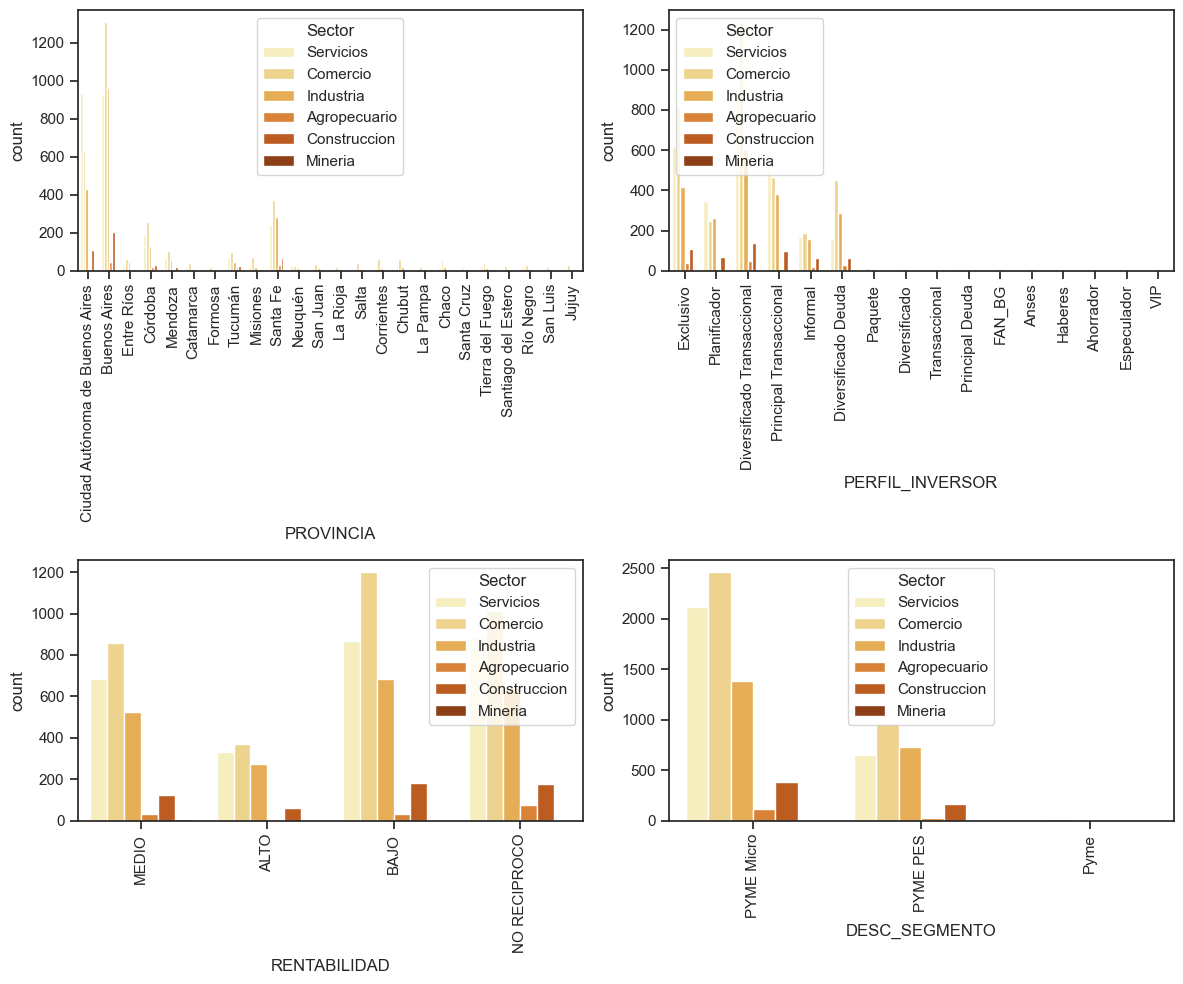

In [22]:
cat_var = ['PROVINCIA','PERFIL_INVERSOR','RENTABILIDAD', 'DESC_SEGMENTO']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
axs = axs.flatten()

for i, var in enumerate(cat_var):
    sns.countplot(x=var, hue='Sector',data=test_new, palette = "YlOrBr", ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)

fig.tight_layout()

plt.show()

In [23]:
Data_pymes = Resultado_Pyme_Personas[(Resultado_Pyme_Personas['DESC_SEGMENTO'] == 'Pyme') | (Resultado_Pyme_Personas['DESC_SEGMENTO'] == 'PYME Micro') | (Resultado_Pyme_Personas['DESC_SEGMENTO'] == 'PYME PES') ]
Data_pymes

,PROVINCIA,CIUDAD,KEY_CLIENT,DESC_SEGMENTO,COD_ACT_AFIP,DESC_ACT_AFIP,RENTABILIDAD,Q_EMPLEADOS,PAGO_SUELDO_CCSS,PERFIL_INVERSOR,SCORING_CREDITICIO,Sector
6,Ciudad Autónoma de Buenos Aires,CIUDAD AUTONOMA DE BUENOS AIRES,d38a9bbecd577c15ca8f4157a7e0eab97d096c3a8f27d8...,PYME Micro,681099.0,SERVICIOS INMOBILIARIOS REALIZADOS POR CUENTA ...,MEDIO,0,0.0,Exclusivo,4801448,Servicios
46,Buenos Aires,QUILMES,e24d0693a8fac884deadec1e9638145895a7d404af2d47...,PYME Micro,692000.0,"SERVICIOS DE CONTABILIDAD, AUDITORMA Y ASESORM...",ALTO,7,27314.0,Planificador,7770378,Servicios
50,Buenos Aires,SUIPACHA,03e005d27e00005a910e925fd81ff949a08d9a2415bd00...,PYME Micro,702092.0,"SERVICIOS DE ASESORAMIENTO, DIRECCISN Y GESTIS...",NaN,0,0.0,NaN,0,Servicios
54,Buenos Aires,AVELLANEDA,71d6f3141bf8fafa6f4aaf8727379ad1d0afedd4620ae2...,PYME Micro,381100.0,"RECOLECCISN, TRANSPORTE, TRATAMIENTO Y DISPOSI...",MEDIO,3,8942634.0,Exclusivo,7130314,Servicios
57,Buenos Aires,PIEDRITAS,d0c2c18ac714908fd464c0b657679d94b02041f2a71e17...,PYME Micro,473000.0,VENTA AL POR MENOR DE COMBUSTIBLE PARA VEHMCUL...,BAJO,4,13114.0,Diversificado Transaccional,7205597,Comercio
...,...,...,...,...,...,...,...,...,...,...,...,...
85772,Ciudad Autónoma de Buenos Aires,CIUDAD AUTONOMA DE BUENOS AIRES,2c83721efa0bb61b13097bad0e1d42ed2293b4875393ad...,PYME Micro,477470.0,"VENTA AL POR MENOR DE PRODUCTOS VETERINARIOS, ...",MEDIO,4,56702.0,Principal Transaccional,6464969,Comercio
85773,Córdoba,VILLA ALLENDE,8693ebd71ce6b38641b971f1994e7b91b5bbcaba3453bf...,PYME Micro,410021.0,"CONSTRUCCISN, REFORMA Y REPARACISN DE EDIFICIO...",MEDIO,27,88000.0,Principal Transaccional,717403,Construccion
85774,Buenos Aires,LOBOS,5af9fac2623f8b087f4d85c62cccfbfa997f000ce5a5f6...,PYME PES,477320.0,"VENTA AL POR MENOR DE PRODUCTOS COSMITICOS, DE...",MEDIO,16,711463.0,Principal Transaccional,701183,Comercio
85775,Córdoba,CORDOBA,6190b622ef4ea20a514942e8b817ade046092a41c709b2...,PYME Micro,432190.0,"INSTALACISN, EJECUCISN Y MANTENIMIENTO DE INST...",BAJO,0,0.0,NaN,0,Construccion


In [24]:
Pymes_clean = Data_pymes.drop(columns=['CIUDAD'])
Pymes_clean.dropna(subset=['DESC_ACT_AFIP'], inplace=True)
Pymes_clean

,PROVINCIA,KEY_CLIENT,DESC_SEGMENTO,COD_ACT_AFIP,DESC_ACT_AFIP,RENTABILIDAD,Q_EMPLEADOS,PAGO_SUELDO_CCSS,PERFIL_INVERSOR,SCORING_CREDITICIO,Sector
6,Ciudad Autónoma de Buenos Aires,d38a9bbecd577c15ca8f4157a7e0eab97d096c3a8f27d8...,PYME Micro,681099.0,SERVICIOS INMOBILIARIOS REALIZADOS POR CUENTA ...,MEDIO,0,0.0,Exclusivo,4801448,Servicios
46,Buenos Aires,e24d0693a8fac884deadec1e9638145895a7d404af2d47...,PYME Micro,692000.0,"SERVICIOS DE CONTABILIDAD, AUDITORMA Y ASESORM...",ALTO,7,27314.0,Planificador,7770378,Servicios
50,Buenos Aires,03e005d27e00005a910e925fd81ff949a08d9a2415bd00...,PYME Micro,702092.0,"SERVICIOS DE ASESORAMIENTO, DIRECCISN Y GESTIS...",NaN,0,0.0,NaN,0,Servicios
54,Buenos Aires,71d6f3141bf8fafa6f4aaf8727379ad1d0afedd4620ae2...,PYME Micro,381100.0,"RECOLECCISN, TRANSPORTE, TRATAMIENTO Y DISPOSI...",MEDIO,3,8942634.0,Exclusivo,7130314,Servicios
57,Buenos Aires,d0c2c18ac714908fd464c0b657679d94b02041f2a71e17...,PYME Micro,473000.0,VENTA AL POR MENOR DE COMBUSTIBLE PARA VEHMCUL...,BAJO,4,13114.0,Diversificado Transaccional,7205597,Comercio
...,...,...,...,...,...,...,...,...,...,...,...
85772,Ciudad Autónoma de Buenos Aires,2c83721efa0bb61b13097bad0e1d42ed2293b4875393ad...,PYME Micro,477470.0,"VENTA AL POR MENOR DE PRODUCTOS VETERINARIOS, ...",MEDIO,4,56702.0,Principal Transaccional,6464969,Comercio
85773,Córdoba,8693ebd71ce6b38641b971f1994e7b91b5bbcaba3453bf...,PYME Micro,410021.0,"CONSTRUCCISN, REFORMA Y REPARACISN DE EDIFICIO...",MEDIO,27,88000.0,Principal Transaccional,717403,Construccion
85774,Buenos Aires,5af9fac2623f8b087f4d85c62cccfbfa997f000ce5a5f6...,PYME PES,477320.0,"VENTA AL POR MENOR DE PRODUCTOS COSMITICOS, DE...",MEDIO,16,711463.0,Principal Transaccional,701183,Comercio
85775,Córdoba,6190b622ef4ea20a514942e8b817ade046092a41c709b2...,PYME Micro,432190.0,"INSTALACISN, EJECUCISN Y MANTENIMIENTO DE INST...",BAJO,0,0.0,NaN,0,Construccion


In [25]:
Mask_0 = Pymes_clean['Q_EMPLEADOS'] > 0.0
datos_Limpios_0 = Pymes_clean.loc[Mask_0]
datos_Limpios_0['PAGO_SUELDO_CCSS'] = datos_Limpios_0['PAGO_SUELDO_CCSS'].abs() 
Mask_02 = datos_Limpios_0['PAGO_SUELDO_CCSS'] > 0.0
datos_Limpios_0 = datos_Limpios_0.loc[Mask_02]
datos_Limpios_0 = datos_Limpios_0.reset_index(drop=True)
datos_Limpios_0.at[6251, 'Sector'] = 'Servicios'

datos_Limpios_0

C:\Users\102140\AppData\Local\Temp\ipykernel_23116\2804618101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_Limpios_0['PAGO_SUELDO_CCSS'] = datos_Limpios_0['PAGO_SUELDO_CCSS'].abs()


,PROVINCIA,KEY_CLIENT,DESC_SEGMENTO,COD_ACT_AFIP,DESC_ACT_AFIP,RENTABILIDAD,Q_EMPLEADOS,PAGO_SUELDO_CCSS,PERFIL_INVERSOR,SCORING_CREDITICIO,Sector
0,Buenos Aires,e24d0693a8fac884deadec1e9638145895a7d404af2d47...,PYME Micro,692000.0,"SERVICIOS DE CONTABILIDAD, AUDITORMA Y ASESORM...",ALTO,7,27314.0,Planificador,7770378,Servicios
1,Buenos Aires,71d6f3141bf8fafa6f4aaf8727379ad1d0afedd4620ae2...,PYME Micro,381100.0,"RECOLECCISN, TRANSPORTE, TRATAMIENTO Y DISPOSI...",MEDIO,3,8942634.0,Exclusivo,7130314,Servicios
2,Buenos Aires,d0c2c18ac714908fd464c0b657679d94b02041f2a71e17...,PYME Micro,473000.0,VENTA AL POR MENOR DE COMBUSTIBLE PARA VEHMCUL...,BAJO,4,13114.0,Diversificado Transaccional,7205597,Comercio
3,Buenos Aires,344c4932913dddf763bdab2f984f9f1c217f881469da26...,PYME Micro,453210.0,VENTA AL POR MENOR DE CAMARAS Y CUBIERTAS,MEDIO,2,7173933.0,Diversificado Transaccional,7393782,Comercio
4,Entre Ríos,4779b7eccd635d050c59cb3d5281f872195839dfebe90f...,PYME Micro,475300.0,"VENTA AL POR MENOR DE ELECTRODOMISTICOS, ARTEF...",MEDIO,2,5529851.0,Exclusivo,7105901,Comercio
...,...,...,...,...,...,...,...,...,...,...,...
6473,Ciudad Autónoma de Buenos Aires,5645812533d6663ed6a63ebc430ae6cd67cf65718351f5...,PYME Micro,620100.0,SERVICIOS DE CONSULTORES EN INFORMATICA Y SUMI...,BAJO,1,12500.0,Exclusivo,6783904,Industria
6474,Ciudad Autónoma de Buenos Aires,2c83721efa0bb61b13097bad0e1d42ed2293b4875393ad...,PYME Micro,477470.0,"VENTA AL POR MENOR DE PRODUCTOS VETERINARIOS, ...",MEDIO,4,56702.0,Principal Transaccional,6464969,Comercio
6475,Córdoba,8693ebd71ce6b38641b971f1994e7b91b5bbcaba3453bf...,PYME Micro,410021.0,"CONSTRUCCISN, REFORMA Y REPARACISN DE EDIFICIO...",MEDIO,27,88000.0,Principal Transaccional,717403,Construccion
6476,Buenos Aires,5af9fac2623f8b087f4d85c62cccfbfa997f000ce5a5f6...,PYME PES,477320.0,"VENTA AL POR MENOR DE PRODUCTOS COSMITICOS, DE...",MEDIO,16,711463.0,Principal Transaccional,701183,Comercio


c:\Users\102140\Anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\102140\Anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\102140\Anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\102140\Anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\102140\Anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\102140\Anaconda3\envs\dhdsblend2021\

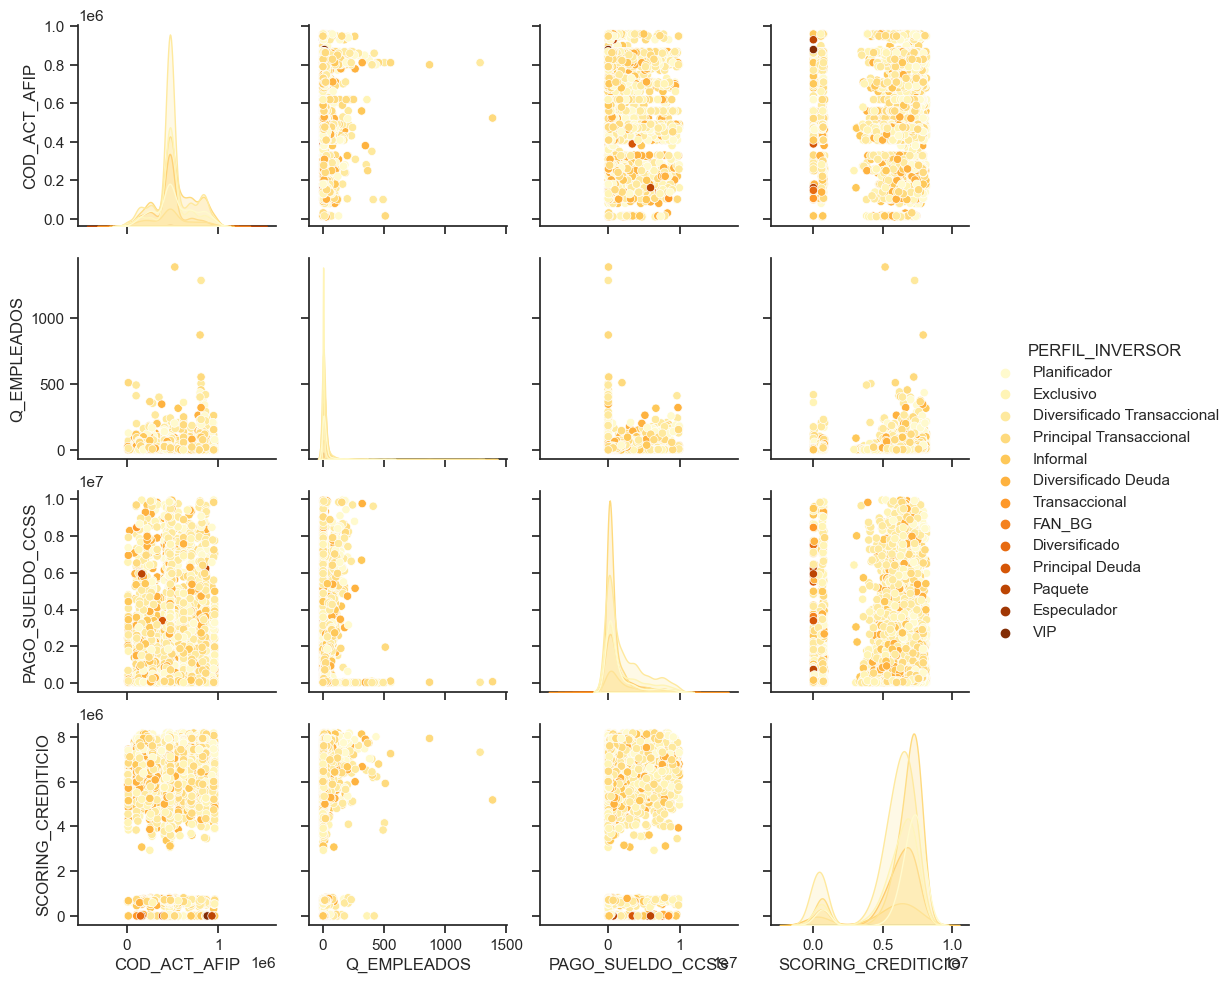

In [589]:
sns.pairplot(datos_Limpios_0.iloc[:,:], hue="PERFIL_INVERSOR", palette = "YlOrBr")

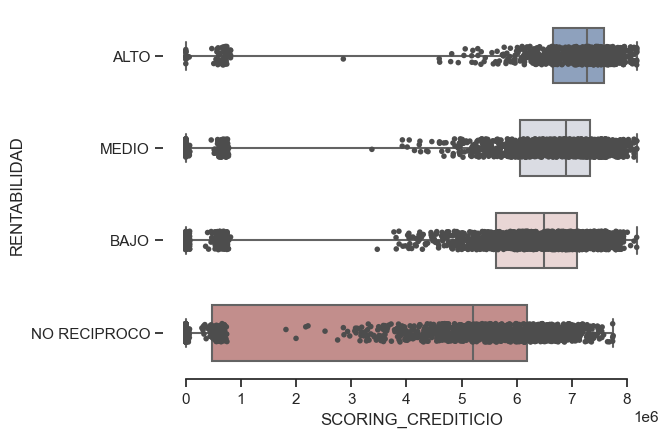

In [30]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x="SCORING_CREDITICIO", y="RENTABILIDAD", data=datos_Limpios_0,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="SCORING_CREDITICIO", y="RENTABILIDAD", data=datos_Limpios_0,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

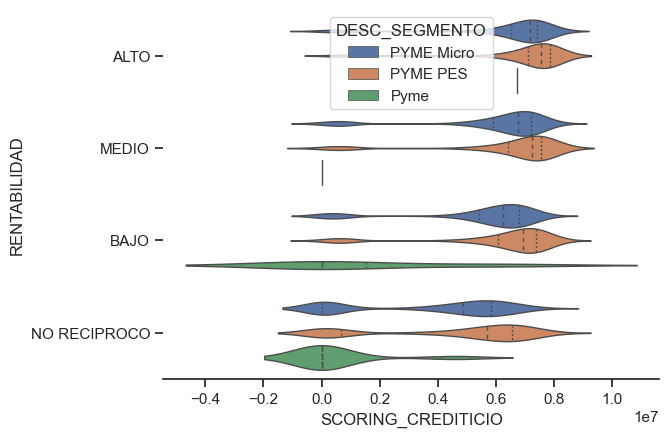

In [36]:
sns.violinplot(data=datos_Limpios_0, x="SCORING_CREDITICIO", y="RENTABILIDAD", hue="DESC_SEGMENTO",
               split=False, inner="quart", linewidth=1)
sns.despine(left=True)

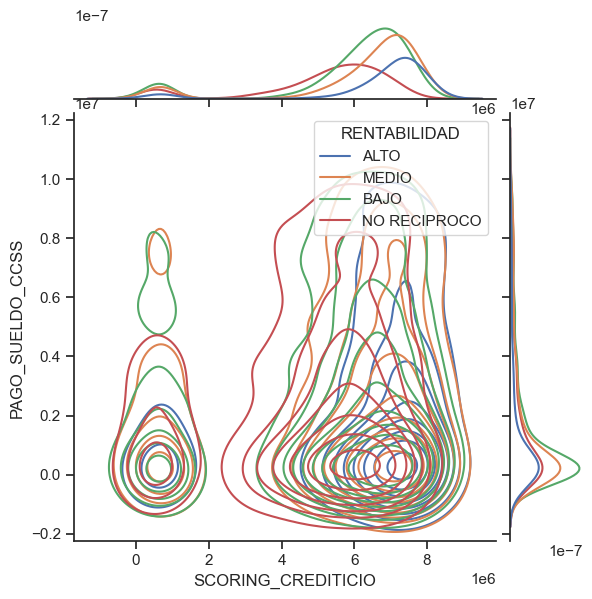

In [26]:
sns.set_theme(style="ticks")

filtered_data = datos_Limpios_0[datos_Limpios_0['SCORING_CREDITICIO'] > 0]

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=filtered_data,
    x="SCORING_CREDITICIO", y="PAGO_SUELDO_CCSS", hue="RENTABILIDAD",
    kind="kde",
)

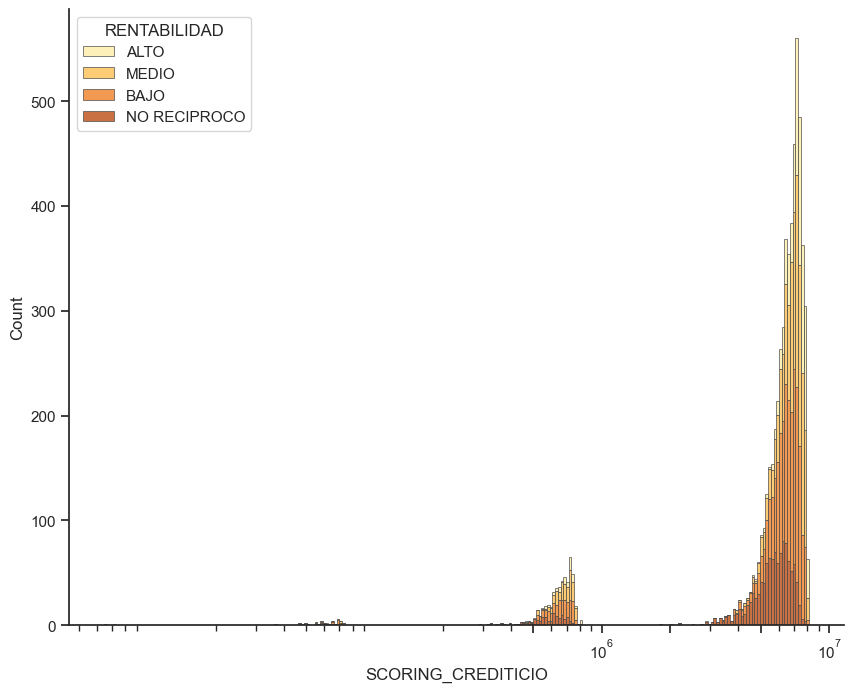

In [590]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 8))
sns.despine(f)

filtered_data = datos_Limpios_0[datos_Limpios_0['SCORING_CREDITICIO'] > 0]

sns.histplot(
    data=filtered_data,
    x="SCORING_CREDITICIO",
    hue="RENTABILIDAD",
    multiple="stack",
    palette = "YlOrBr",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.set_xscale('log')
ax.set_xticks([500000, 1000000, 2000000, 5000000, 10000000])

plt.show()

In [27]:
distribucion_conjunta = datos_Limpios_0.groupby(['PERFIL_INVERSOR', 'Sector']).size().reset_index(name='Cantidad')
total_cantidad = distribucion_conjunta['Cantidad'].sum()
distribucion_conjunta['Porcentaje'] = distribucion_conjunta['Cantidad'] / total_cantidad

In [28]:
distribuciones_por_servicio = {}

distribuciones_por_servicio['Agropecuario'] = distribucion_conjunta[distribucion_conjunta['Sector'] == 'Agropecuario']
distribuciones_por_servicio['Comercio'] = distribucion_conjunta[distribucion_conjunta['Sector'] == 'Comercio']
distribuciones_por_servicio['Construccion'] = distribucion_conjunta[distribucion_conjunta['Sector'] == 'Construccion']
distribuciones_por_servicio['Industria'] = distribucion_conjunta[distribucion_conjunta['Sector'] == 'Industria']
distribuciones_por_servicio['Servicios'] = distribucion_conjunta[distribucion_conjunta['Sector'] == 'Servicios']
distribuciones_por_servicio['Mineria'] = distribucion_conjunta[distribucion_conjunta['Sector'] == 'Mineria']

filas_nans = datos_Limpios_0[datos_Limpios_0['PERFIL_INVERSOR'].isnull()]

for index, row in filas_nans.iterrows():
    servicio_actual = row['Sector']
    distribucion_actual = distribuciones_por_servicio.get(servicio_actual)
    if distribucion_actual is not None and not distribucion_actual.empty:
        probabilidades = distribucion_actual['Porcentaje']
        
        if not np.isclose(probabilidades.sum(), 1.0):
            probabilidades = probabilidades / probabilidades.sum()

        fila_imputada = np.random.choice(
            distribucion_actual.index,
            p=probabilidades
        )
        perfil_inversor_imputado = distribucion_actual.loc[fila_imputada, 'PERFIL_INVERSOR']
        datos_Limpios_0.at[index, 'PERFIL_INVERSOR'] = perfil_inversor_imputado


In [586]:
datos_Limpios_0.isna().sum()

PROVINCIA               0
KEY_CLIENT              0
DESC_SEGMENTO           0
COD_ACT_AFIP            0
DESC_ACT_AFIP           0
RENTABILIDAD          190
Q_EMPLEADOS             0
PAGO_SUELDO_CCSS        0
PERFIL_INVERSOR       618
SCORING_CREDITICIO      0
Sector                  0
dtype: int64

In [485]:
Data_negocios = Resultado_Pyme_Personas[(Resultado_Pyme_Personas['DESC_SEGMENTO'] == 'NEGOCIOS Y PROFESIONALES GOLD') | (Resultado_Pyme_Personas['DESC_SEGMENTO'] == 'NEGOCIOS Y PROFESIONALES') ]
Data_negocios

,PROVINCIA,CIUDAD,KEY_CLIENT,DESC_SEGMENTO,COD_ACT_AFIP,DESC_ACT_AFIP,RENTABILIDAD,Q_EMPLEADOS,PAGO_SUELDO_CCSS,PERFIL_INVERSOR,SCORING_CREDITICIO,Sector
0,Formosa,FORMOSA,7dc7616e7e9c41c9ef0ab6de733a8fa932a149720aec7e...,NEGOCIOS Y PROFESIONALES,14113.0,"CRMA DE GANADO BOVINO, EXCEPTO LA REALIZADA EN...",NaN,0,0.0,Transaccional,0,Agropecuario
1,Ciudad Autónoma de Buenos Aires,CIUDAD AUTONOMA DE BUENOS AIRES,51c79997f0b7446fecde2d0248eeff0bcba9b9e4411497...,NEGOCIOS Y PROFESIONALES GOLD,469090.0,VENTA AL POR MAYOR DE MERCANCMAS N.C.P.,NaN,2,7467298.0,Paquete,0,Comercio
2,Ciudad Autónoma de Buenos Aires,CIUDAD AUTONOMA DE BUENOS AIRES,c6e1f36191e7bdccbf2045cf394db38304a1a5a560008c...,NEGOCIOS Y PROFESIONALES GOLD,681098.0,SERVICIOS INMOBILIARIOS REALIZADOS POR CUENTA ...,NaN,0,0.0,Principal Deuda,0,Servicios
3,Ciudad Autónoma de Buenos Aires,CIUDAD AUTONOMA DE BUENOS AIRES,330b2682647e9da65841b5b44c72994b66fe551f39f8ad...,NEGOCIOS Y PROFESIONALES GOLD,477210.0,VENTA AL POR MENOR DE ARTMCULOS DE TALABARTERM...,NaN,0,0.0,Principal Deuda,0,Comercio
4,Ciudad Autónoma de Buenos Aires,CIUDAD AUTONOMA DE BUENOS AIRES,04cdd2d80899b576f1edcfdce3980f51e4781b6bd59a6a...,NEGOCIOS Y PROFESIONALES,702091.0,"SERVICIOS DE ASESORAMIENTO, DIRECCISN Y GESTIS...",NaN,0,0.0,Transaccional,0,Servicios
...,...,...,...,...,...,...,...,...,...,...,...,...
85505,Ciudad Autónoma de Buenos Aires,CIUDAD AUTONOMA DE BUENOS AIRES,fb1b14182f137adbacc6975daaf8a8327c4f34c75d878c...,NEGOCIOS Y PROFESIONALES GOLD,862110.0,SERVICIOS DE CONSULTA MIDICA (INCLUYE LAS ACTI...,NaN,0,0.0,Transaccional,0,Servicios
85506,Ciudad Autónoma de Buenos Aires,CIUDAD AUTONOMA BUENOS AI,257996e3a8cc3990ab20bf22e505769112be324791fcf1...,NEGOCIOS Y PROFESIONALES,472160.0,"VENTA AL POR MENOR DE FRUTAS, LEGUMBRES Y HORT...",NaN,0,0.0,Transaccional,0,Comercio
85507,Ciudad Autónoma de Buenos Aires,CIUDAD AUTONOMA DE BUENOS AIRES,e79ee8c74bf1a3db1bba8d29d213ce3979db2078dbcaf6...,NEGOCIOS Y PROFESIONALES,960201.0,SERVICIOS DE PELUQUERMA,NaN,0,0.0,NaN,0,Servicios
85508,Ciudad Autónoma de Buenos Aires,CIUDAD AUTONOMA BUENOS AI,d8975972e3a7ca534b2fcafc20ffd113452bcabe171550...,NEGOCIOS Y PROFESIONALES,321020.0,"FABRICACISN DE \BIJOUTERIE\"" ( I N C L U Y E L...",NaN,0,0.0,Transaccional,0,Industria


In [487]:
Negocios_clean = Data_negocios.drop(columns=['RENTABILIDAD', 'SCORING_CREDITICIO', 'CIUDAD'])
Negocios_clean.dropna(subset=['DESC_ACT_AFIP'], inplace=True)
Negocios_clean

,PROVINCIA,KEY_CLIENT,DESC_SEGMENTO,COD_ACT_AFIP,DESC_ACT_AFIP,Q_EMPLEADOS,PAGO_SUELDO_CCSS,PERFIL_INVERSOR,Sector
0,Formosa,7dc7616e7e9c41c9ef0ab6de733a8fa932a149720aec7e...,NEGOCIOS Y PROFESIONALES,14113.0,"CRMA DE GANADO BOVINO, EXCEPTO LA REALIZADA EN...",0,0.0,Transaccional,Agropecuario
1,Ciudad Autónoma de Buenos Aires,51c79997f0b7446fecde2d0248eeff0bcba9b9e4411497...,NEGOCIOS Y PROFESIONALES GOLD,469090.0,VENTA AL POR MAYOR DE MERCANCMAS N.C.P.,2,7467298.0,Paquete,Comercio
2,Ciudad Autónoma de Buenos Aires,c6e1f36191e7bdccbf2045cf394db38304a1a5a560008c...,NEGOCIOS Y PROFESIONALES GOLD,681098.0,SERVICIOS INMOBILIARIOS REALIZADOS POR CUENTA ...,0,0.0,Principal Deuda,Servicios
3,Ciudad Autónoma de Buenos Aires,330b2682647e9da65841b5b44c72994b66fe551f39f8ad...,NEGOCIOS Y PROFESIONALES GOLD,477210.0,VENTA AL POR MENOR DE ARTMCULOS DE TALABARTERM...,0,0.0,Principal Deuda,Comercio
4,Ciudad Autónoma de Buenos Aires,04cdd2d80899b576f1edcfdce3980f51e4781b6bd59a6a...,NEGOCIOS Y PROFESIONALES,702091.0,"SERVICIOS DE ASESORAMIENTO, DIRECCISN Y GESTIS...",0,0.0,Transaccional,Servicios
...,...,...,...,...,...,...,...,...,...
85505,Ciudad Autónoma de Buenos Aires,fb1b14182f137adbacc6975daaf8a8327c4f34c75d878c...,NEGOCIOS Y PROFESIONALES GOLD,862110.0,SERVICIOS DE CONSULTA MIDICA (INCLUYE LAS ACTI...,0,0.0,Transaccional,Servicios
85506,Ciudad Autónoma de Buenos Aires,257996e3a8cc3990ab20bf22e505769112be324791fcf1...,NEGOCIOS Y PROFESIONALES,472160.0,"VENTA AL POR MENOR DE FRUTAS, LEGUMBRES Y HORT...",0,0.0,Transaccional,Comercio
85507,Ciudad Autónoma de Buenos Aires,e79ee8c74bf1a3db1bba8d29d213ce3979db2078dbcaf6...,NEGOCIOS Y PROFESIONALES,960201.0,SERVICIOS DE PELUQUERMA,0,0.0,NaN,Servicios
85508,Ciudad Autónoma de Buenos Aires,d8975972e3a7ca534b2fcafc20ffd113452bcabe171550...,NEGOCIOS Y PROFESIONALES,321020.0,"FABRICACISN DE \BIJOUTERIE\"" ( I N C L U Y E L...",0,0.0,Transaccional,Industria


In [506]:
Mask_NaN02 = Negocios_clean['PROVINCIA'].isna()
Negocios_clean.loc[Mask_NaN02]

,PROVINCIA,KEY_CLIENT,DESC_SEGMENTO,COD_ACT_AFIP,DESC_ACT_AFIP,Q_EMPLEADOS,PAGO_SUELDO_CCSS,PERFIL_INVERSOR,Sector
8097,NaN,cc5f1a75750c0475b5322e8520bf38a485adbacb11646a...,NEGOCIOS Y PROFESIONALES GOLD,492290.0,SERVICIO DE TRANSPORTE AUTOMOTOR DE CARGAS N.C...,0,0.0,Transaccional,Industria
10281,NaN,2a657f34509444b5763d570c22fd908bf7577474d6f39c...,NEGOCIOS Y PROFESIONALES GOLD,960990.0,SERVICIOS PERSONALES N.C.P. (INCLUYE ACTIVIDAD...,0,0.0,Diversificado,Servicios
14623,NaN,0f71d51e4a3cb41dbd672456d23da4c3dd998ded624868...,NEGOCIOS Y PROFESIONALES,479900.0,VENTA AL POR MENOR NO REALIZADA EN ESTABLECIMI...,0,0.0,Diversificado,Comercio
21468,NaN,6e23f8f7ff7415ac01ee11dcf29ad9532f5873537b1b9a...,NEGOCIOS Y PROFESIONALES GOLD,620100.0,SERVICIOS DE CONSULTORES EN INFORMATICA Y SUMI...,0,0.0,Principal Deuda,Industria
22106,NaN,87967524966181074c835015e00d692c37fdc1b1abfa70...,NEGOCIOS Y PROFESIONALES GOLD,492120.0,SERVICIOS DE TRANSPORTE AUTOMOTOR DE PASAJEROS...,0,0.0,Principal Deuda,Industria
40733,NaN,3d7a33476bad641ddece94d37afc46b1eb86f236e009d4...,NEGOCIOS Y PROFESIONALES GOLD,479900.0,VENTA AL POR MENOR NO REALIZADA EN ESTABLECIMI...,0,0.0,Diversificado,Comercio
45820,NaN,3e32ba44b19e4b397fc2b6bb72435b5246e4180f2f56a2...,NEGOCIOS Y PROFESIONALES GOLD,492280.0,SERVICIO DE TRANSPORTE AUTOMOTOR URBANO DE CAR...,1,2278855.0,Principal Deuda,Industria


In [489]:
Mask_0 = Negocios_clean['Q_EMPLEADOS'] > 0.0
datos_Limpios = Negocios_clean.loc[Mask_0]
datos_Limpios['PAGO_SUELDO_CCSS'] = datos_Limpios['PAGO_SUELDO_CCSS'].abs() 
Mask_02 = datos_Limpios['PAGO_SUELDO_CCSS'] > 0.0
datos_Limpios = datos_Limpios.loc[Mask_02]
datos_Limpios = datos_Limpios.reset_index(drop=True)
datos_Limpios

C:\Users\102140\AppData\Local\Temp\ipykernel_12796\3146030763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_Limpios['PAGO_SUELDO_CCSS'] = datos_Limpios['PAGO_SUELDO_CCSS'].abs()


,PROVINCIA,KEY_CLIENT,DESC_SEGMENTO,COD_ACT_AFIP,DESC_ACT_AFIP,Q_EMPLEADOS,PAGO_SUELDO_CCSS,PERFIL_INVERSOR,Sector
0,Ciudad Autónoma de Buenos Aires,51c79997f0b7446fecde2d0248eeff0bcba9b9e4411497...,NEGOCIOS Y PROFESIONALES GOLD,469090.0,VENTA AL POR MAYOR DE MERCANCMAS N.C.P.,2,7467298.0,Paquete,Comercio
1,Ciudad Autónoma de Buenos Aires,2e277df9ce63726feea8b06aca1d9603ac0edebbf52650...,NEGOCIOS Y PROFESIONALES GOLD,692000.0,"SERVICIOS DE CONTABILIDAD, AUDITORMA Y ASESORM...",2,9512206.0,Diversificado,Servicios
2,Ciudad Autónoma de Buenos Aires,1b42d0e80f3d40dece9deae1e7420b97d1b4bc45c00f1e...,NEGOCIOS Y PROFESIONALES GOLD,711009.0,SERVICIOS DE ARQUITECTURA E INGENIERMA Y SERVI...,2,406845.0,Principal Deuda,Servicios
3,Ciudad Autónoma de Buenos Aires,059d789e16ed13a934f22f0be506911ecad4cc7ade18c7...,NEGOCIOS Y PROFESIONALES GOLD,692000.0,"SERVICIOS DE CONTABILIDAD, AUDITORMA Y ASESORM...",3,5432364.0,Principal Deuda,Servicios
4,Ciudad Autónoma de Buenos Aires,5feede7740a228c86164db5633621864c97c5fed8d461f...,NEGOCIOS Y PROFESIONALES GOLD,691001.0,SERVICIOS JURMDICOS,1,18000.0,Principal Deuda,Servicios
...,...,...,...,...,...,...,...,...,...
7496,Ciudad Autónoma de Buenos Aires,3f6c8c9e079a96bf390834742d6d8cdf62503f537c9472...,NEGOCIOS Y PROFESIONALES GOLD,862200.0,SERVICIOS ODONTOLSGICOS,3,287968.0,Principal Deuda,Servicios
7497,Buenos Aires,e58d7622c2d2c5dcfddcce109f18c3b923f52c944e65c4...,NEGOCIOS Y PROFESIONALES GOLD,492280.0,SERVICIO DE TRANSPORTE AUTOMOTOR URBANO DE CAR...,2,2380607.0,Diversificado,Industria
7498,Buenos Aires,96ff5d0add834d7cca9debb0f293892829b1272326d81d...,NEGOCIOS Y PROFESIONALES GOLD,131300.0,ACABADO DE PRODUCTOS TEXTILES,2,2786477.0,Paquete,Industria
7499,La Rioja,e8f0185b7ac9a57c195e2dd149ced94fbb3340e83b5103...,NEGOCIOS Y PROFESIONALES GOLD,854910.0,ENSEQANZA DE IDIOMAS,1,1791487.0,Principal Deuda,Servicios


In [490]:
Mask_NaN = datos_Limpios['PERFIL_INVERSOR'].isna()
datos_Limpios[Mask_NaN]

,PROVINCIA,KEY_CLIENT,DESC_SEGMENTO,COD_ACT_AFIP,DESC_ACT_AFIP,Q_EMPLEADOS,PAGO_SUELDO_CCSS,PERFIL_INVERSOR,Sector
11,Tucumán,2e32c4221772741f2d993587ac1cb22a8051c3a128acad...,NEGOCIOS Y PROFESIONALES GOLD,14113.0,"CRMA DE GANADO BOVINO, EXCEPTO LA REALIZADA EN...",1,263099.0,NaN,Agropecuario
23,Ciudad Autónoma de Buenos Aires,0407581656894137ec46169d2054fd51ac6ec4fc8a5f5d...,NEGOCIOS Y PROFESIONALES,477430.0,"VENTA AL POR MENOR DE \BIJOUTERIE\"" Y FANTASMA""",9,18114.0,NaN,Comercio
26,Santa Fe,8241e9e5941e901ddf170f56b5b73180b483c10db3c369...,NEGOCIOS Y PROFESIONALES GOLD,492120.0,SERVICIOS DE TRANSPORTE AUTOMOTOR DE PASAJEROS...,2,11648.0,NaN,Industria
28,Santa Fe,c09e235033b183abd5caf57789f11d0c164031a73d3176...,NEGOCIOS Y PROFESIONALES,492190.0,SERVICIO DE TRANSPORTE AUTOMOTOR DE PASAJEROS ...,1,21840.0,NaN,Industria
41,Misiones,7781c329e678413bb68abff4b3a812a3555d23482e0d39...,NEGOCIOS Y PROFESIONALES,869090.0,SERVICIOS RELACIONADOS CON LA SALUD HUMANA N.C...,1,477679.0,NaN,Servicios
...,...,...,...,...,...,...,...,...,...
7473,Buenos Aires,2f0d8f3bc939953799f355b1a6ce2074540d6bf97fad77...,NEGOCIOS Y PROFESIONALES,960202.0,"SERVICIOS DE TRATAMIENTO DE BELLEZA, EXCEPTO L...",2,762666.0,NaN,Servicios
7476,Ciudad Autónoma de Buenos Aires,93a85a9a15cf568739473656614eb15377923eae4c2a07...,NEGOCIOS Y PROFESIONALES,472130.0,"VENTA AL POR MENOR DE CARNES ROJAS, MENUDENCIA...",5,13114.0,NaN,Comercio
7484,La Rioja,2ccfa63d9dd17729b7eccb00b67d9074bf8d135947dfe0...,NEGOCIOS Y PROFESIONALES GOLD,477320.0,"VENTA AL POR MENOR DE PRODUCTOS COSMITICOS, DE...",1,1785249.0,NaN,Comercio
7485,Ciudad Autónoma de Buenos Aires,5ad578d49f9d28cb6f053e369bca8865fc0d9a46d5443b...,NEGOCIOS Y PROFESIONALES GOLD,561019.0,SERVICIOS DE EXPENDIO DE COMIDAS Y BEBIDAS EN ...,1,1659663.0,NaN,Servicios


In [491]:
porcentajes = datos_Limpios['PERFIL_INVERSOR'].value_counts(normalize=True)
porcentajes

Principal Deuda                0.346413
Diversificado                  0.243474
Transaccional                  0.180758
Paquete                        0.162371
Especulador                    0.066163
Diversificado Transaccional    0.000821
Name: PERFIL_INVERSOR, dtype: float64

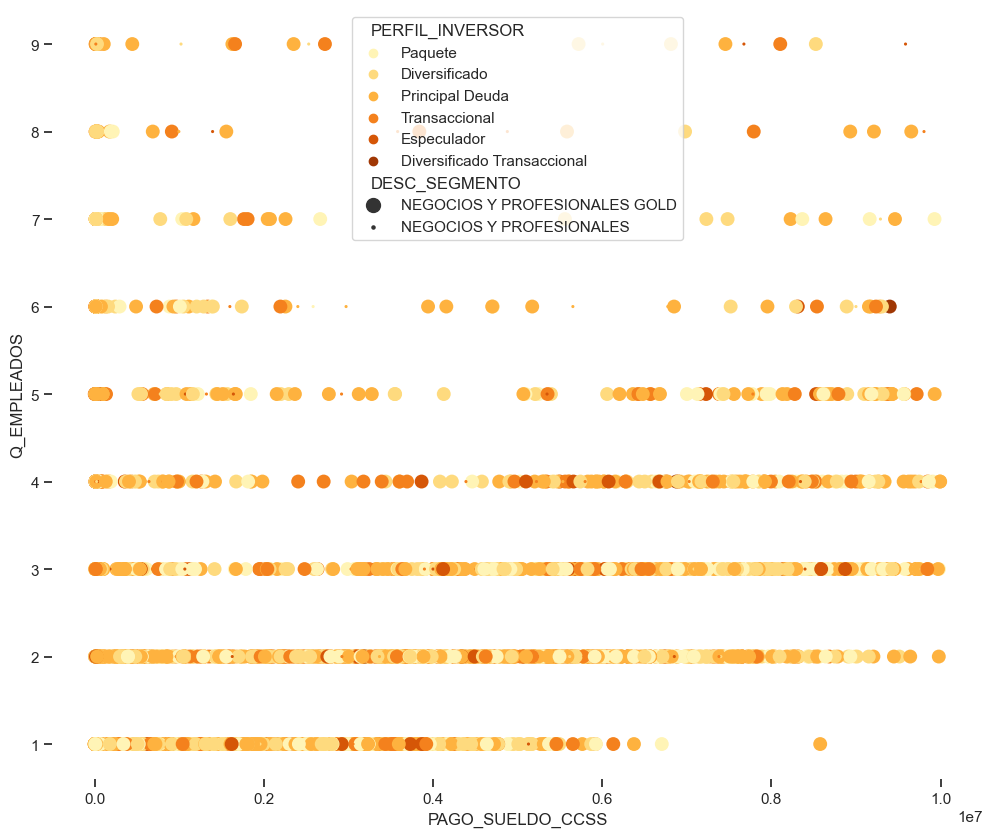

In [492]:
f, ax = plt.subplots(figsize=(12, 10))

filtered_data2 = datos_Limpios[datos_Limpios['Q_EMPLEADOS'] < 10]

sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='PAGO_SUELDO_CCSS', y='Q_EMPLEADOS',
                hue='PERFIL_INVERSOR',
                palette="YlOrBr",
                sizes=(5, 100), linewidth=0, size='DESC_SEGMENTO',
                data=filtered_data2, ax=ax)
plt.show()

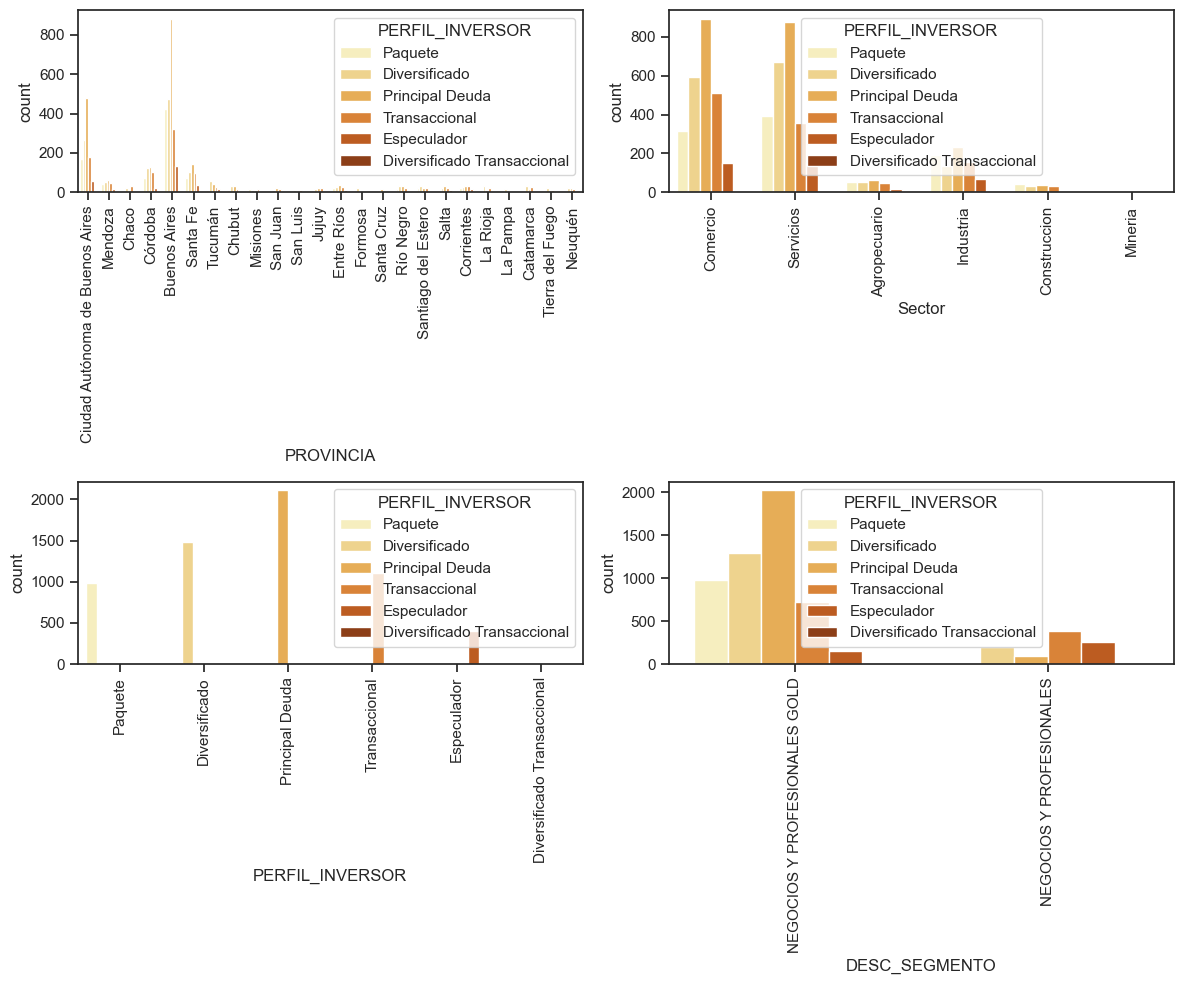

In [493]:
cat_var = ['PROVINCIA','Sector','PERFIL_INVERSOR', 'DESC_SEGMENTO']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
axs = axs.flatten()

for i, var in enumerate(cat_var):
    sns.countplot(x=var, hue='PERFIL_INVERSOR',data=datos_Limpios, palette = "YlOrBr", ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)

fig.tight_layout()

plt.show()

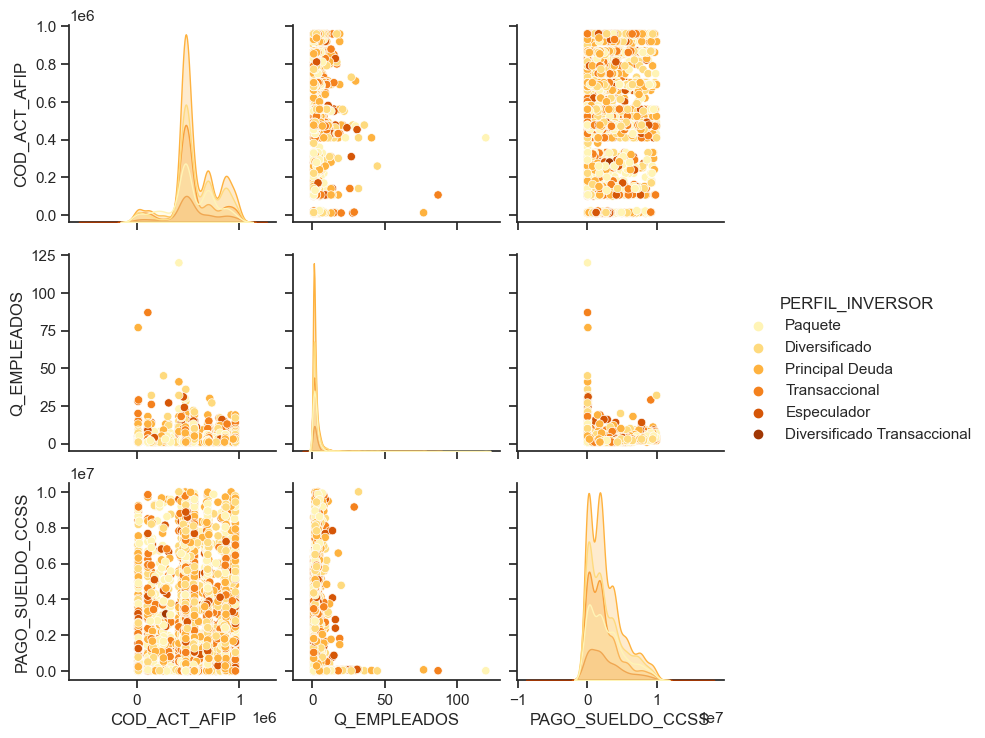

In [494]:
sns.pairplot(datos_Limpios.iloc[:,:], hue="PERFIL_INVERSOR", palette = "YlOrBr")

In [495]:
distribucion_conjunta = datos_Limpios.groupby(['PERFIL_INVERSOR', 'Sector']).size().reset_index(name='Cantidad')
distribucion_conjunta

,PERFIL_INVERSOR,Sector,Cantidad
0,Diversificado,Agropecuario,55
1,Diversificado,Comercio,591
2,Diversificado,Construccion,32
3,Diversificado,Industria,137
4,Diversificado,Servicios,668
5,Diversificado Transaccional,Agropecuario,1
6,Diversificado Transaccional,Comercio,1
7,Diversificado Transaccional,Industria,1
8,Diversificado Transaccional,Servicios,2
9,Especulador,Agropecuario,16


In [496]:
datos_mineria = Resultado_Pyme_Personas[(Resultado_Pyme_Personas['Sector'] == 'Mineria')]
distribucion_conjunta_Mineria = datos_mineria.groupby(['PERFIL_INVERSOR', 'Sector']).size().reset_index(name='Cantidad')

In [497]:
distribucion_conjunta_Merge = distribucion_conjunta.merge(distribucion_conjunta_Mineria, how='outer')

In [498]:
total_cantidad = distribucion_conjunta_Merge['Cantidad'].sum()
distribucion_conjunta_Merge['Porcentaje'] = distribucion_conjunta_Merge['Cantidad'] / total_cantidad

In [499]:
distribuciones_por_servicio = {}

distribuciones_por_servicio['Agropecuario'] = distribucion_conjunta_Merge[distribucion_conjunta_Merge['Sector'] == 'Agropecuario']
distribuciones_por_servicio['Comercio'] = distribucion_conjunta_Merge[distribucion_conjunta_Merge['Sector'] == 'Comercio']
distribuciones_por_servicio['Construccion'] = distribucion_conjunta_Merge[distribucion_conjunta_Merge['Sector'] == 'Construccion']
distribuciones_por_servicio['Industria'] = distribucion_conjunta_Merge[distribucion_conjunta_Merge['Sector'] == 'Industria']
distribuciones_por_servicio['Servicios'] = distribucion_conjunta_Merge[distribucion_conjunta_Merge['Sector'] == 'Servicios']
distribuciones_por_servicio['Mineria'] = distribucion_conjunta_Merge[distribucion_conjunta_Merge['Sector'] == 'Mineria']

filas_nans = datos_Limpios[datos_Limpios['PERFIL_INVERSOR'].isnull()]

for index, row in filas_nans.iterrows():
    servicio_actual = row['Sector']
    distribucion_actual = distribuciones_por_servicio.get(servicio_actual)
    if distribucion_actual is not None and not distribucion_actual.empty:
        probabilidades = distribucion_actual['Porcentaje']
        
        if not np.isclose(probabilidades.sum(), 1.0):
            probabilidades = probabilidades / probabilidades.sum()

        fila_imputada = np.random.choice(
            distribucion_actual.index,
            p=probabilidades
        )
        perfil_inversor_imputado = distribucion_actual.loc[fila_imputada, 'PERFIL_INVERSOR']
        datos_Limpios.at[index, 'PERFIL_INVERSOR'] = perfil_inversor_imputado



In [550]:
datos_Limpios[datos_Limpios['PROVINCIA'].isna()]

,PROVINCIA,KEY_CLIENT,DESC_SEGMENTO,COD_ACT_AFIP,DESC_ACT_AFIP,Q_EMPLEADOS,PAGO_SUELDO_CCSS,PERFIL_INVERSOR,Sector
4028,NaN,3e32ba44b19e4b397fc2b6bb72435b5246e4180f2f56a2...,NEGOCIOS Y PROFESIONALES GOLD,492280.0,SERVICIO DE TRANSPORTE AUTOMOTOR URBANO DE CAR...,1,2278855.0,Principal Deuda,Industria


In [566]:
datos_Limpios.dropna(subset=['PROVINCIA'], inplace=True)